In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [3]:
X, y = mnist.data, mnist.target

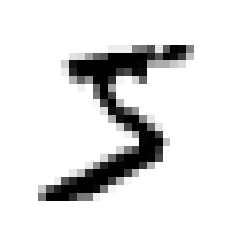

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(X.iloc[0].to_numpy().reshape(28, 28), cmap='binary')
plt.axis(False)
plt.show()

In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [32]:
y_train_5 = y_train == '5'
y_train_5

0         True
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997     True
59998    False
59999    False
Name: class, Length: 60000, dtype: bool

In [33]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [34]:
sgd_clf.predict([X_train.iloc[0].to_numpy().reshape(28, 28).ravel()])

c:\Users\seokj\miniconda3\envs\HandsOn\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [17]:
import pandas as pd
import numpy as np
x = pd.DataFrame(np.random.randn(3, 4))
y = pd.Series([0, 1, 0]).astype(np.int32)
c = SGDClassifier(random_state=42)
c.fit(x, y)
pred = c.predict(x)
print(pred == y)
print(type(pred == y))
print((pred == y).sum())

0    True
1    True
2    True
dtype: bool
<class 'pandas.core.series.Series'>
3


In [18]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)
for train_index, test_index in skfolds.split(X_train, Y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_fold = X_train.iloc[train_index]
    Y_train_fold = Y_train_5.iloc[train_index]
    X_test_fold = X_train.iloc[test_index]
    Y_test_fold = Y_train_5.iloc[test_index]
    clone_clf.fit(X_train_fold, Y_train_fold)
    y_pred = clone_clf.predict(X_test_fold)
    num_correct = (y_pred == Y_test_fold).sum()
    print(num_correct / len(y_pred))
    
    
    

0.9669
0.91625
0.96785


In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, Y_train_5, cv=3)

array([0.95035, 0.96035, 0.9604 ])

In [20]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, Y_train_5, cv=3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

In [23]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, Y_train_5, cv=3)
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [24]:
len(y_train_pred)

60000

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [26]:
confusion_matrix(Y_train_5, Y_train_5)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [29]:
from sklearn.metrics import precision_score, recall_score
precision_score(Y_train_5, y_train_pred), recall_score(Y_train_5, y_train_pred)

(0.8370879772350012, 0.6511713705958311)

In [31]:
from sklearn.metrics import f1_score
f1_score(Y_train_5, y_train_pred)

0.7325171197343846